# Time Series Analysis of NAICS

The **North American Industry Classification System(NAICS)** is an industry classification system developed by the statistical agencies of **Canada,Mexico and the United States**.NAICS is designed to provide common definitions of the industrial structure of the three countries and a commons statistical framework to facilitate the analysis of the three economies.

**Task:** Analyze the data and answer/provide important questions/insights related to Construction.

In [1]:
!ls

A_NEWLY_HIRED_DATA_ANALYST.zip	sample_data


In [2]:
# checking all the datasets in zip file
!unzip A_NEWLY_HIRED_DATA_ANALYST.zip

Archive:  A_NEWLY_HIRED_DATA_ANALYST.zip
   creating: A_NEWLY_HIRED_DATA_ANALYST/
  inflating: A_NEWLY_HIRED_DATA_ANALYST/NAICS-2017 - Statistics-Canada.pdf  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_00_05.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_97_99.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_06_10.csv  
  inflating: A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ

# Data Description:

**SYEAR**: Survey Year

**SMTH:** Survey Month

**AICS:** Industry name and associated NAICS code in the bracket

**_EMPLOYMENT_:** Employment

# Data Preparation

We have been provided with an excel file(read as **ind** below) with the industry names along with the NAICS codes. There are also 15 files(read as **df1-df15** below) containing employment data by
industry at different level of aggregation; **2-digit NAICS, 3-digit NAICS, and 4-digit NAICS**.

We have to match the codes with that in df3 and get the industry names of the respective codes. The resulting final dataframe should look like **output** dataframe below.

**Rule to remember:**

 Try to create each series from the highest possible level of aggregation in the raw data files.
For example, if an LMO Detailed Industry is defined with a 2-digit NAICS only, do not use a
lower level of aggregation (i.e., 3-digit or 4-digit level NAICS files in the RTRA). Similarly,
if an LMO Detailed Industry is defined with a 3-digit NAICS only, do not use the 4-digit
NAICS files for that industry.

This data preparation is purely based on Python capabilities and the ability to work with/manipulate dataframes. So everybody has their own way of doing it to create a dataframe similar in structure to **output**.

In [3]:
import pandas as pd
df1=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_97_99.csv')
df1.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [4]:
df2=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_06_10.csv')
df2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2006,1,1100,1750
1,2006,1,1111,0
2,2006,1,1112,250
3,2006,1,1113,2750
4,2006,1,1114,12250


In [5]:
df3=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_06_10.csv')
df3.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,2006,1,Accommodation and food services [72],166750
1,2006,1,"Administrative and support, waste management a...",82750
2,2006,1,"Agriculture, forestry, fishing and hunting [11]",49000
3,2006,1,"Arts, entertainment and recreation [71]",65000
4,2006,1,Construction [23],160750


In [6]:
df4=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_11_15.csv')
df5=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_00_05.csv')
df6=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_11_15.csv')
df7=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_16_20.csv')
df8=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_00_05.csv')
df9=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_2NAICS_97_99.csv')
df10=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_06_10.csv')
df11=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_97_99.csv')
df12=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_3NAICS_16_20.csv')
df13=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_16_20.csv')
df14=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_00_05.csv')
df15=pd.read_csv('A_NEWLY_HIRED_DATA_ANALYST/RTRA_Employ_4NAICS_11_15.csv')

In [7]:
ind=pd.read_excel('A_NEWLY_HIRED_DATA_ANALYST/LMO_Detailed_Industries_by_NAICS.xlsx')
ind.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [8]:
output=pd.read_excel('A_NEWLY_HIRED_DATA_ANALYST/Data_Output_Template.xlsx')
output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [9]:
output.shape

(15576, 4)

In [10]:
ind.NAICS.unique()

array(['111 & 112', 114, 113, 115, 211, 213, 212, 22, 23, '311 & 312',
       321, 322, 331, 332, 333, 3366,
       '3361,  3362,  3363, 3364, 3365, 3369',
       '313, 314, 315, 316, 323, 324, 325, 326, 327, 334, 335, 337 & 339',
       '41', 441, 446, '442,443,444,445,446,447,448,451,452,453 & 454',
       481, 482, 483, 484, 488, '491 & 492', '485,486 & 487', 493, 524,
       '521, 522, 523 & 526', 53, 5413, 5415, 5416,
       '5411, 5412, 5414, 5417, 5418 & 5419', '55 & 56', 6111, 6112, 6113,
       '6114, 6115, 6116 & 6117', 621, 622, 623, 624, 511, 512, 517,
       '515, 518 & 519', 711, 713, 712, 721, 722, 81, 911, 912,
       '913, 914 & 919'], dtype=object)

In [11]:
ind

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211
5,Support activities for mining and oil and gas ...,213
6,Mining,212
7,Utilities,22
8,Construction,23
9,"Food, beverage and tobacco manufacturing",311 & 312


In [12]:
ind[['A1','A2']]=ind.NAICS.str.split('&',expand=True)
indi=ind.A1.str.split(',',expand=True)
ind=pd.concat([ind,indi],axis=1)

In [13]:
ind1=pd.melt(frame=ind.drop('A1',axis=1),id_vars=['LMO_Detailed_Industry','NAICS'],var_name='Code',value_name='Code_Val')
ind1.dropna(inplace=True)

In [14]:
#ind1['Code_Val'].unique()
ind1['Code_Val']=ind1['Code_Val'].astype('int')

In [15]:
df_c=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15],axis=0)
display(df_c.head(4))
print(df_c.shape)
print(df_c.info())

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250


(119184, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119184 entries, 0 to 18539
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SYEAR         119184 non-null  int64 
 1   SMTH          119184 non-null  int64 
 2   NAICS         119184 non-null  object
 3   _EMPLOYMENT_  119184 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.5+ MB
None


In [16]:
df_c['NAICS']=df_c['NAICS'].astype('str')

In [17]:
df_c.NAICS.unique()

array(['1100', '1111', '1112', '1113', '1114', '1119', '1121', '1122',
       '1123', '1124', '1125', '1129', '1132', '1133', '1141', '1142',
       '1151', '1152', '1153', '2100', '2111', '2121', '2122', '2123',
       '2131', '2211', '2212', '2213', '2361', '2362', '2371', '2372',
       '2373', '2379', '2381', '2382', '2383', '2389', '3111', '3112',
       '3113', '3114', '3115', '3116', '3117', '3118', '3119', '3121',
       '3122', '3131', '3132', '3133', '3141', '3149', '3151', '3152',
       '3159', '3161', '3162', '3169', '3211', '3212', '3219', '3221',
       '3222', '3231', '3241', '3251', '3252', '3253', '3254', '3255',
       '3256', '3259', '3261', '3262', '3271', '3272', '3273', '3274',
       '3279', '3311', '3312', '3313', '3314', '3315', '3321', '3322',
       '3323', '3324', '3325', '3326', '3327', '3328', '3329', '3331',
       '3332', '3333', '3334', '3335', '3336', '3339', '3341', '3342',
       '3343', '3344', '3345', '3346', '3351', '3352', '3353', '3359',
      

In [18]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119184 entries, 0 to 18539
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SYEAR         119184 non-null  int64 
 1   SMTH          119184 non-null  int64 
 2   NAICS         119184 non-null  object
 3   _EMPLOYMENT_  119184 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.5+ MB


In [19]:
df_c['Code_Num']=df_c.NAICS.str.extract('(\d{1,})')

In [20]:
df_c.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_,Code_Num
0,1997,1,1100,3500,1100
1,1997,1,1111,250,1111
2,1997,1,1112,500,1112
3,1997,1,1113,2250,1113
4,1997,1,1114,5250,1114


In [21]:
df_c['Code_Num']=df_c['Code_Num'].astype('float')

In [22]:
ind1.head()

,LMO_Detailed_Industry,NAICS,Code,Code_Val
0,Farms,111 & 112,A2,112
9,"Food, beverage and tobacco manufacturing",311 & 312,A2,312
17,Other manufacturing,"313, 314, 315, 316, 323, 324, 325, 326, 327, 3...",A2,339
21,Other retail trade (excluding cars and persona...,"442,443,444,445,446,447,448,451,452,453 & 454",A2,454
27,"Postal service, couriers and messengers",491 & 492,A2,492


In [23]:
ind1.LMO_Detailed_Industry.unique()

array(['Farms', 'Food, beverage and tobacco manufacturing',
       'Other manufacturing',
       'Other retail trade (excluding cars and personal care) ',
       'Postal service, couriers and messengers',
       'Transit, sightseeing, and pipeline transportation', 'Finance',
       'Legal, accounting, design, research, and advertising services',
       'Business, building and other support services',
       'Private and trades education',
       'Broadcasting, data processing, and information',
       'Local and Indigenous public administration',
       'Transportation equipment manufacturing (excluding shipbuilding)',
       'Wholesale trade'], dtype=object)

In [24]:
ind1.Code_Val.unique()

array([ 112,  312,  339,  454,  492,  487,  526, 5419,   56, 6117,  519,
        919,  111,  311, 3361,  313,   41,  442,  491,  485,  521, 5411,
         55, 6114,  515,  913, 3362,  314,  443,  486,  522, 5412, 6115,
        518,  914, 3363,  315,  444,  523, 5414, 6116, 3364,  316,  445,
       5417, 3365,  323,  446, 5418, 3369,  324,  447,  325,  448,  326,
        451,  327,  452,  334,  453,  335,  337])

In [25]:
ind1['Code_Val']=ind1['Code_Val'].astype('float')

In [26]:
df_c['3_']=df_c['Code_Num']//10
df_c['2']=df_c['3_']//10
import numpy as np
#df_c['Code_Num']=np.where(df_c['Code_Num']>999,df_c['Code_Num'],0)
df_c['3_']=np.where(df_c['3_']>99,df_c['3_'],0)
#df_c['Code_Num']=np.where(df_c['2']>999,df_c['2'],0)
#df_c.Code_Num.unique()

In [27]:
output.head()

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN
2,1997,1,Ambulatory health care services,NaN
3,1997,1,"Amusement, gambling and recreation industries",NaN
4,1997,1,"Architectural, engineering and related services",NaN


In [28]:
d1=pd.merge(left=ind1[['LMO_Detailed_Industry','Code_Val']],right=df_c[['SYEAR','SMTH','Code_Num','_EMPLOYMENT_']],left_on='Code_Val',right_on='Code_Num',how='inner')
d2=pd.merge(left=ind1[['LMO_Detailed_Industry','Code_Val']],right=df_c[['SYEAR','SMTH','3_','_EMPLOYMENT_']],left_on='Code_Val',right_on='3_',how='inner')
d3=pd.merge(left=ind1[['LMO_Detailed_Industry','Code_Val']],right=df_c[['SYEAR','SMTH','2','_EMPLOYMENT_']],left_on='Code_Val',right_on='2',how='inner')

In [29]:
d1.shape[0]+d2.shape[0]+d3.shape[0]

58920

In [30]:
d1.drop(['Code_Val','Code_Num'],axis=1,inplace=True)
d2.drop(['Code_Val','3_'],axis=1,inplace=True)
d3.drop(['Code_Val','2'],axis=1,inplace=True)

In [34]:
mer_f=pd.concat([d1,d2,d3],axis=0)
mer_f.shape

(58920, 4)

In [35]:
mer_f.head()

,LMO_Detailed_Industry,SYEAR,SMTH,_EMPLOYMENT_
0,Farms,2011,1,10750
1,Farms,2011,2,8500
2,Farms,2011,3,8000
3,Farms,2011,4,10750
4,Farms,2011,5,9250


mer_f is the final dataframe we will perform our time series analysis on. It's similat to the **output** table, which was our goal.

# Time Series Analysis

In [36]:
mer_f.sort_values(by=['SYEAR','SMTH','LMO_Detailed_Industry'],inplace=True)
mer_f.head(20)

,LMO_Detailed_Industry,SYEAR,SMTH,_EMPLOYMENT_
2952,"Broadcasting, data processing, and information",1997,1,3000
6528,"Broadcasting, data processing, and information",1997,1,4750
9012,"Broadcasting, data processing, and information",1997,1,2000
5424,"Broadcasting, data processing, and information",1997,1,3000
13020,"Broadcasting, data processing, and information",1997,1,4750
16248,"Broadcasting, data processing, and information",1997,1,2000
2448,"Business, building and other support services",1997,1,58500
6024,"Business, building and other support services",1997,1,1750
0,"Business, building and other support services",1997,1,0
1,"Business, building and other support services",1997,1,3250


In [37]:
mer_f2=mer_f.groupby(['SYEAR','SMTH','LMO_Detailed_Industry'])['_EMPLOYMENT_'].sum().reset_index()
mer_f2.head()

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
0,1997,1,"Broadcasting, data processing, and information",19500
1,1997,1,"Business, building and other support services",120750
2,1997,1,Farms,44750
3,1997,1,Finance,98500
4,1997,1,"Food, beverage and tobacco manufacturing",48750


In [38]:
mer_f2.loc[:,'Date'] = pd.to_datetime(mer_f2.SYEAR.astype(str)+' '+mer_f2.SMTH.astype(str)).dt.date

In [39]:
mer_f2.set_index('Date')

,SYEAR,SMTH,LMO_Detailed_Industry,_EMPLOYMENT_
Date,,,,
1997-01-01,1997,1,"Broadcasting, data processing, and information",19500
1997-01-01,1997,1,"Business, building and other support services",120750
1997-01-01,1997,1,Farms,44750
1997-01-01,1997,1,Finance,98500
1997-01-01,1997,1,"Food, beverage and tobacco manufacturing",48750
...,...,...,...,...
2019-12-01,2019,12,"Postal service, couriers and messengers",0
2019-12-01,2019,12,Private and trades education,0
2019-12-01,2019,12,"Transit, sightseeing, and pipeline transportation",0


In [40]:
mer_f3=pd.pivot_table(mer_f2[['LMO_Detailed_Industry','_EMPLOYMENT_','Date']],columns=['LMO_Detailed_Industry'],values='_EMPLOYMENT_',aggfunc=np.mean,index='Date')
mer_f3.head()

LMO_Detailed_Industry,"Broadcasting, data processing, and information","Business, building and other support services",Farms,Finance,"Food, beverage and tobacco manufacturing","Legal, accounting, design, research, and advertising services",Local and Indigenous public administration,Other manufacturing,Other retail trade (excluding cars and personal care),"Postal service, couriers and messengers",Private and trades education,"Transit, sightseeing, and pipeline transportation",Transportation equipment manufacturing (excluding shipbuilding),Wholesale trade
Date,,,,,,,,,,,,,,
1997-01-01,19500,120750,44750,98500,48750,48000,66250,110000,396250,32250,15250,23500,8000,143750
1997-02-01,20750,122000,47750,98500,52250,48500,66500,114250,408250,33750,17250,27500,8500,126750
1997-03-01,24250,113500,48000,98250,50500,49500,67750,110750,405750,30250,16000,24250,9000,130750
1997-04-01,27250,122750,51000,105750,41250,53000,68750,113250,413500,29250,16500,24500,9250,129500
1997-05-01,23750,122250,54250,102500,43500,52750,65500,124500,407250,30000,15250,28250,8250,144250


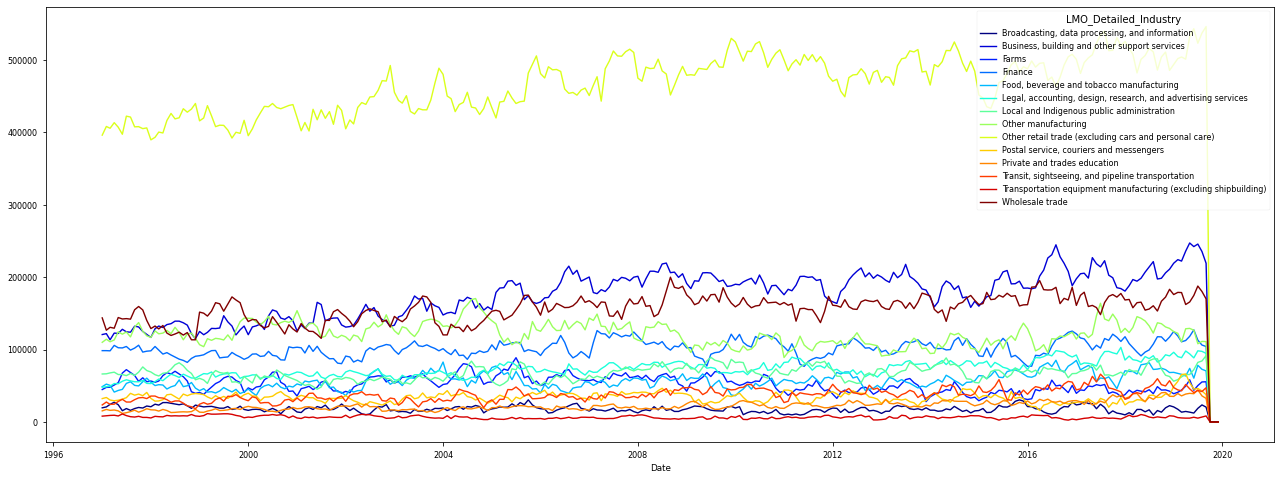

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
mer_f3.plot(colormap='jet',figsize=(22,8))

We plotted the time series data for all the sectors in one plot as seen above for comparative analysis. We can see that **Other retail trade (excluding cars and personal care)** has much higher employment numbers than other industries thoughout. **Transportation equipment manufacturing (excluding shipbuilding)** has almost the lowest employment numbers of all throughout. There are some **cyclical patters** observed in all the time series at varying point of times. Also a **trend** can be hinted in case of few.

More detailed analysis can be done by analuzing each time series individually, decomposing it, checking the correlation between them ,ACF & PACF plots etc.

Now we will see each of the time series plot individually.

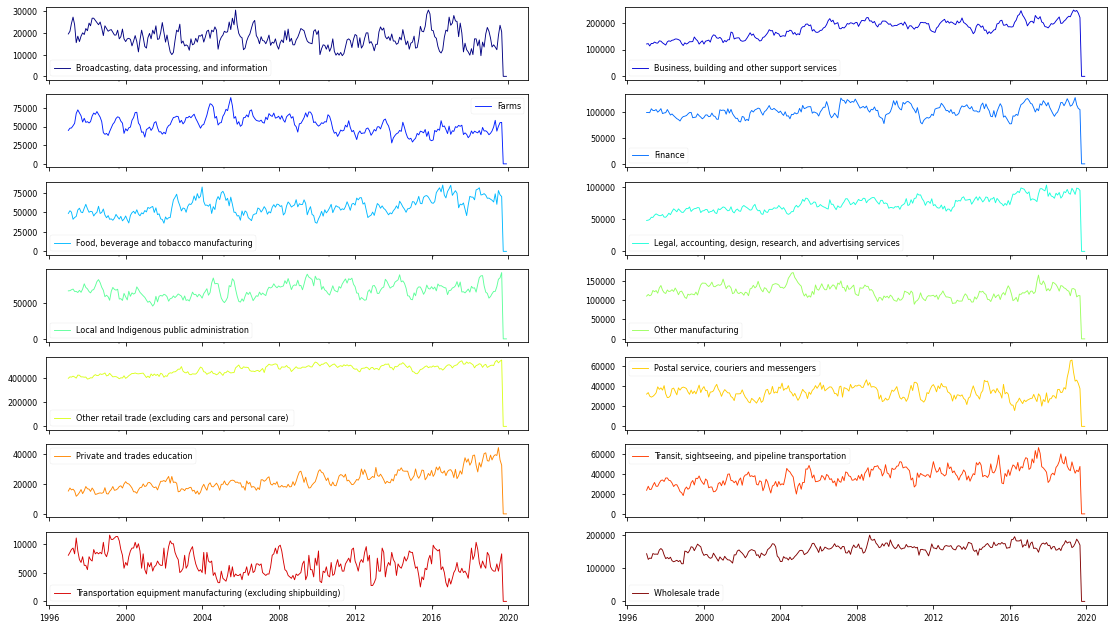

In [42]:
plt.style.use('seaborn-paper')
try:
   g=mer_f3.plot(subplots=True,linewidth=0.9,layout=(7,2),figsize=(19,11),sharex=True,sharey=False,colormap='jet',fontsize=0.001,xticks=True)
except:
   pass

Above we plotted each time series individually. We can get varying insights about them by observing them. For eg: there is upward trends present insome like **'Private and trades education'**, **'Business, building and other support services'** etc. whereas slight negative trends are seen in farms etc. Some time series like **'Finance'**,**'Broadcasting, data processing, and information'** shows no trend.

Industry -specific observations can also be obtained from the plots. Like, **Farms** employment remained constant till 2010 with cyclical patterns then suddenly started showing downward trend. Reason for that needs further investigation.

There are cyclical patterns are present in almost all and in order to check if the cyclical patterns denotes seasonality we will use seasonal ACF and PACF plots or decomposition plots later.

We will check the distribution of values of each series using **Boxplot**.

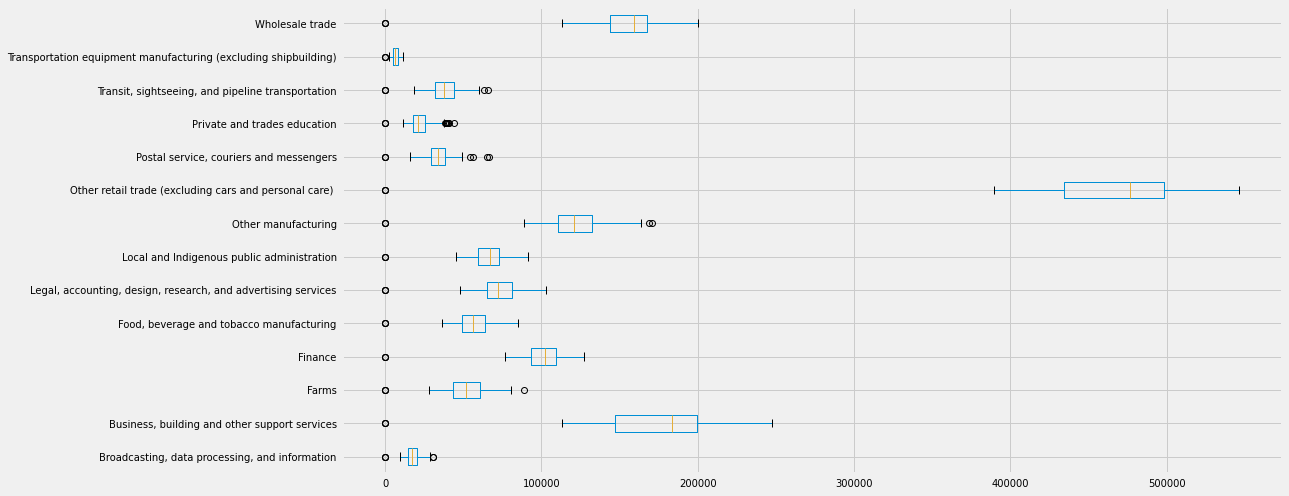

In [43]:
plt.style.use('fivethirtyeight')
box=mer_f3.boxplot(fontsize=10,vert=False,figsize=(15,8))

Bosplot helps us to analyze the distribution of data for each time series and comparison of data values across each other.

As seen before  **Other retail trade (excluding cars and personal care)** has higher range of values than all other series and T**ransportation equipment manufacturing (excluding shipbuilding)** has lowest values. There are outliers present in some time series indicating in some years employment number were high in those industries thus they hired many people at those years. This a an indication that at those years those industries performed well.

We will check the similarity between two series using **clustermap**.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


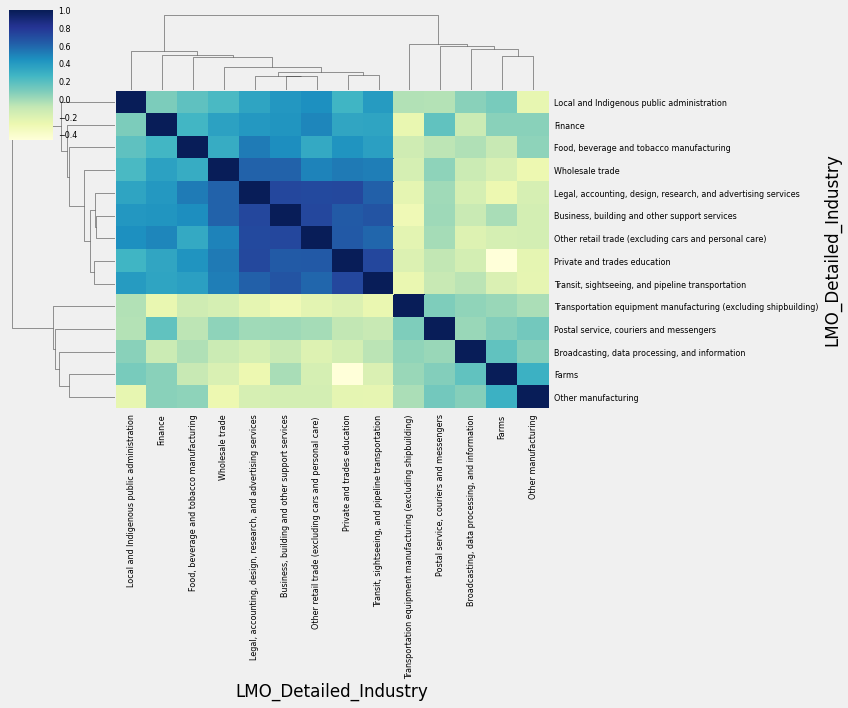

In [44]:
import seaborn as sns
corr_mat=mer_f3.corr(method='spearman')
fig=sns.clustermap(corr_mat,row_cluster=True,col_cluster=True,figsize=(12,10),cmap='YlGnBu')


The above clustermap shows which industries were similar in performance overall. Time series with similar characteristics are closer than those of different characteristics. For eg: **Business, building and other support services** and **Other retail trade (excluding cars and personal care)** formed closed cluster so they have characteristics.

Conversely, **Finance** and **Other manufacturing** are far away from each other in the hierarchical dendogram so they are quite dissimialr time series.

We will look into this in more details

In the below cells we will try to validate the results obtained from clustermap.

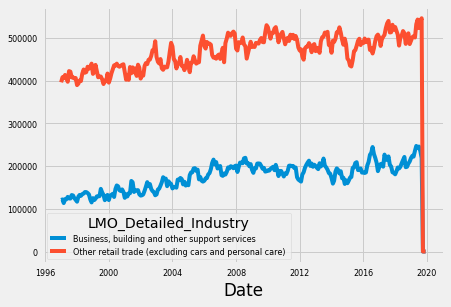

In [45]:
mer_f3[['Business, building and other support services','Other retail trade (excluding cars and personal care) ']].plot()

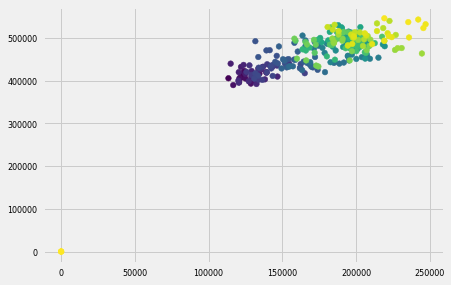

In [46]:
plt.scatter(data=mer_f3,x='Business, building and other support services',y='Other retail trade (excluding cars and personal care) ',c=np.arange(len(mer_f3)),cmap='viridis')

From the above scatterplot we really can get a hint of correlation between the two time series across all time periods(lowest to highest) for **Business, building and other support services** and **Other retail trade (excluding cars and personal care)**. So our interpretation from clustermap was true.

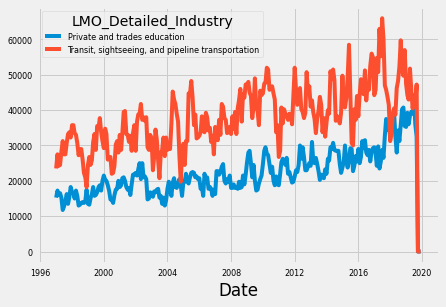

In [47]:
mer_f3[['Private and trades education','Transit, sightseeing, and pipeline transportation']].plot()

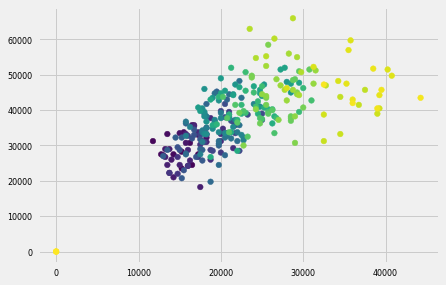

In [48]:
plt.scatter(data=mer_f3,x='Private and trades education',y='Transit, sightseeing, and pipeline transportation',c=np.arange(len(mer_f3)),cmap='viridis')

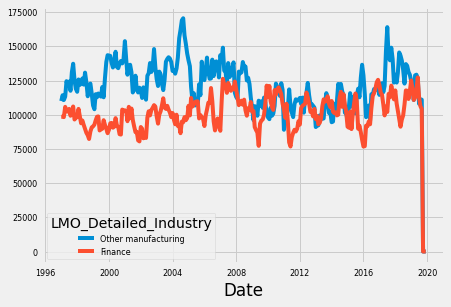

In [49]:
mer_f3[['Other manufacturing','Finance']].plot()

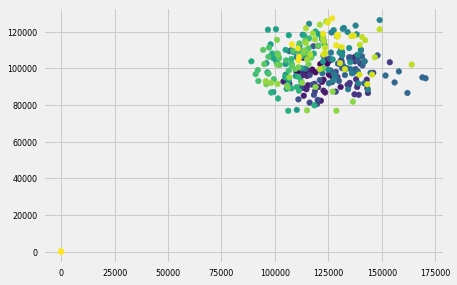

In [50]:
plt.scatter(data=mer_f3,x='Other manufacturing',y='Finance',c=np.arange(len(mer_f3)),cmap='viridis')

From the above scatterplot we hardly can find correlation/similarity between the two time series across all time periods(lowest to highest) for **Finance** and **Other manufacturing**. They just seem to be scattered bit randomly in a particular region. So our interpretation from clustermap was true.

Below we defined a function, that calculates the percent change of the latest datapoint from the mean of a window of previous data points. This will help in calculating the %change of the series over a rolling window. So we geneally standardize the mean and variance of time series over time to make them comparable if their absolute changes a lot over time.

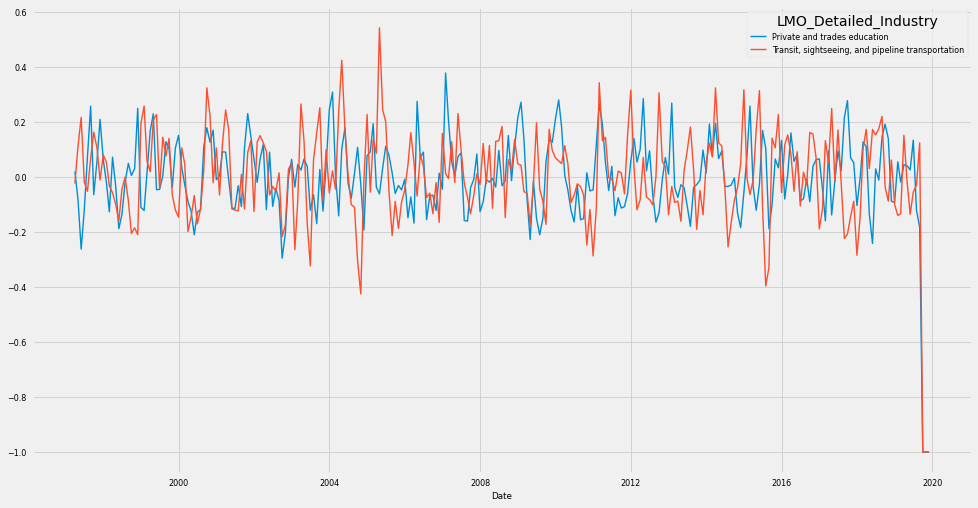

In [51]:
def percent_change(series):
      prev_val=series[:-1]
      last_val=series[-1]
      percent_change=(last_val-np.mean(prev_val))/np.mean(prev_val)
      return percent_change
plt.style.use('seaborn-paper')
perc=mer_f3[['Private and trades education','Transit, sightseeing, and pipeline transportation']].rolling(4).apply(percent_change)
perc.plot(figsize=(15,8))

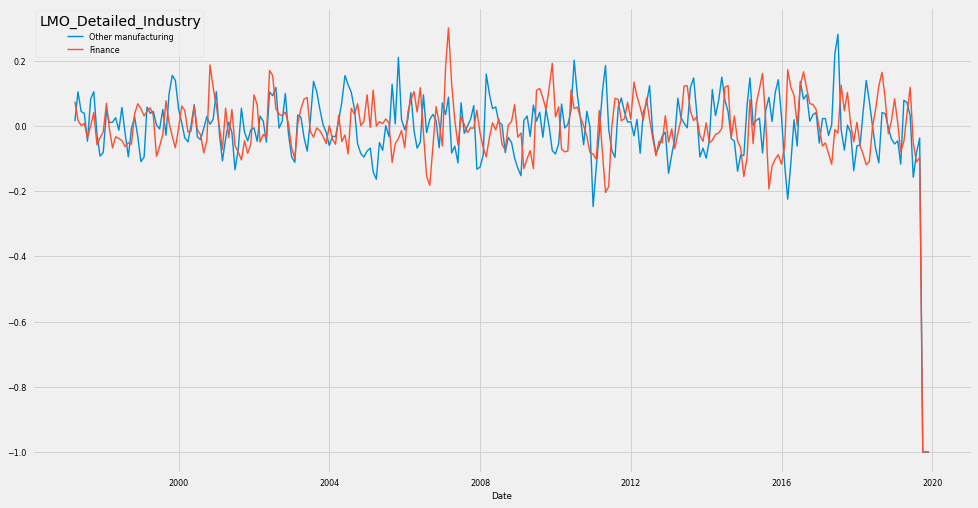

In [52]:
perc1=mer_f3[['Other manufacturing','Finance']].rolling(4).apply(percent_change)
perc1.plot(figsize=(15,8))

Unfortunately, after standardization it's hard to ascertain by naked eyes which one of them has the two time series resembling closer. But from correlationa and clustermap we already know that former one(**Private and trades education** vs **Transit, sightseeing, and pipeline transportation**) should be closer.

With more zoomed-in analysis we might say the difference.

In [53]:
col=mer_f3.columns.tolist()
col

['Broadcasting, data processing, and information',
 'Business, building and other support services',
 'Farms',
 'Finance',
 'Food, beverage and tobacco manufacturing',
 'Legal, accounting, design, research, and advertising services',
 'Local and Indigenous public administration',
 'Other manufacturing',
 'Other retail trade (excluding cars and personal care) ',
 'Postal service, couriers and messengers',
 'Private and trades education',
 'Transit, sightseeing, and pipeline transportation',
 'Transportation equipment manufacturing (excluding shipbuilding)',
 'Wholesale trade']

Now we will plot the **ACF and PACF plots** for each time series.

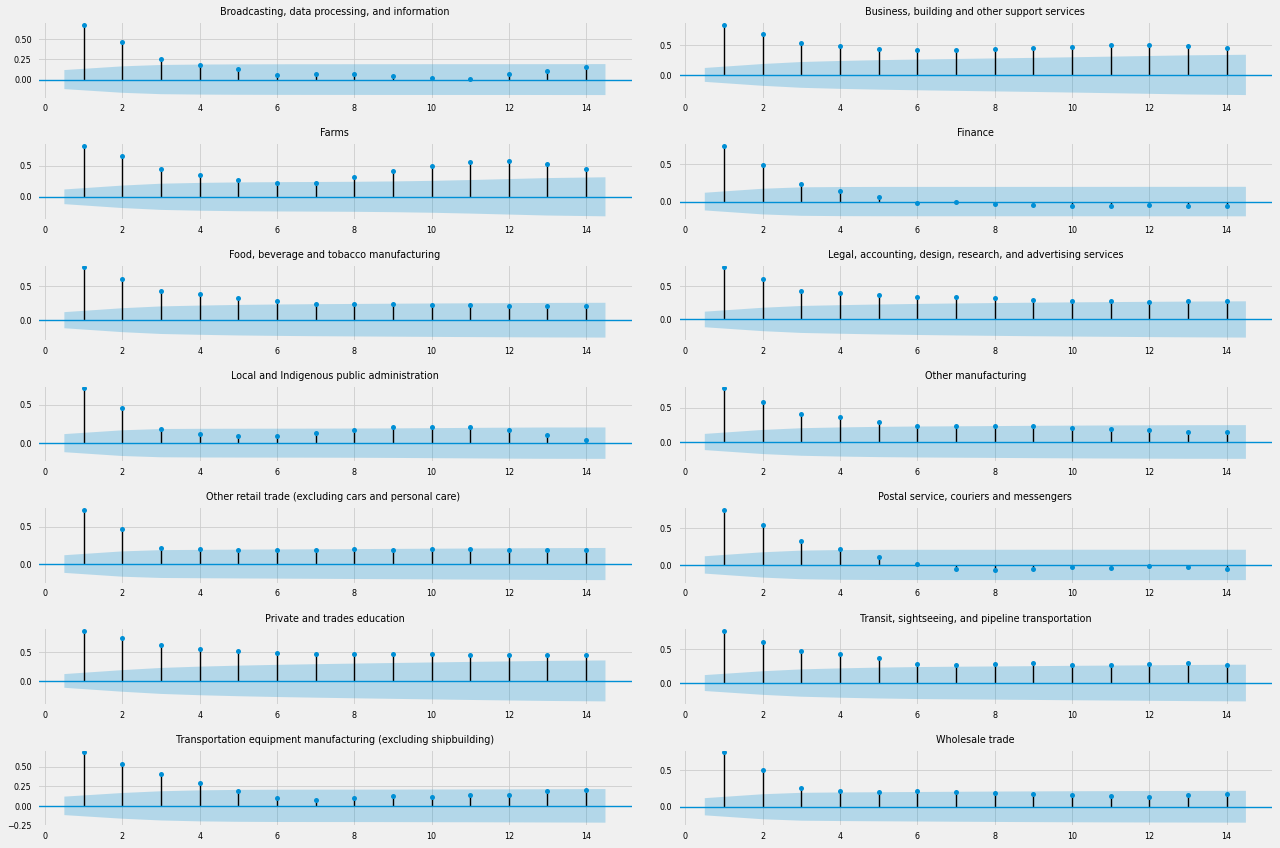

In [54]:
# ACF plots
from statsmodels.graphics import tsaplots
#plt.figure(figsize=(12,12)),
fig,axes=plt.subplots(7,2,figsize=(18,12))
axes=axes.ravel()
for i,ax in enumerate(axes):
  tsaplots.plot_acf(mer_f3[col[i]],lags=14,ax=ax,zero=False)
  ax.set_title(col[i])
plt.tight_layout()
  

WE can take MA(4) model for **Braodcasting, data processing and information** as 4 significant lags can be seen. It's also MA(4) for **Postal, service, couriers and messengers**.For **private and trades education** the lags tails off slowly so it's hard to ascertain the lag order from here. We need to use AIC, BIC scores here. Same for **Transit,sightseing, and pipeline transportation**.

If ACF plot is high and tails off very very slowly there is a possibility that the time series is non-satationary. Eg: **Business, building and other support services** may be non-stationary.

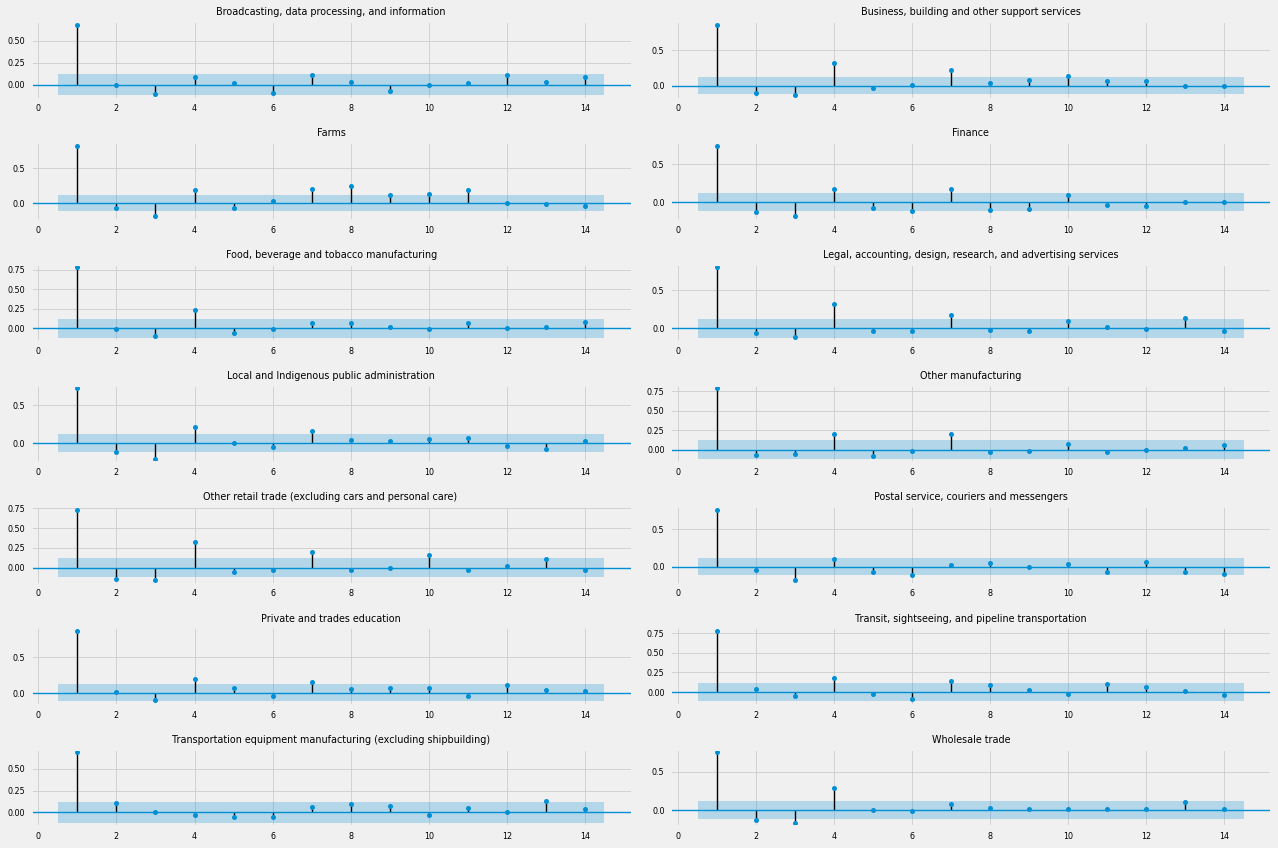

In [55]:
# PACF plots
fig,axes=plt.subplots(7,2,figsize=(18,12))
axes=axes.ravel()
for i,ax in enumerate(axes):
  tsaplots.plot_pacf(mer_f3[col[i]],lags=14,ax=ax,zero =False)
  ax.set_title(col[i])
plt.tight_layout()


We can found the order of AR from PACF plots from the number of significant lags. For eg: **Broadcasting, data processing and information** has AR(1) model. For **Private and trades education**, it's hard to tell as it tails off very slowly. We can use AIC, BIC scores for them to find their order. For **finance** we can take AR(1) model, as we could neglect lags at higher values as they are outside our limits and not in the first few lags. **Wholesale trade** can be another similar example of AR(1) model.

We will check the stationarity of each time series using **Augmented Dicky Fuller Test** .

**Null Hypothesis (HA):** The time series is not stationary.

**Alternate Hypothesis (HB):** The time series is stationary.

If **p-value<0.05** we reject null hypothesis in favor of alternate hypothesis with 95% significance level.

In [56]:
from statsmodels.tsa.stattools import adfuller
col2=[]
col3=[]
for i in col:
  print(i, 'p-value: {}'.format(adfuller(mer_f3[i])[1]))
  if adfuller(mer_f3[i])[1]>0.05:
    print('non-stationary')
    col2.append(i)
  else:
    col3.append(i)
  print('\n')

Broadcasting, data processing, and information p-value: 3.439445688329133e-08


Business, building and other support services p-value: 0.2504946874071453
non-stationary


Farms p-value: 0.8562445533497807
non-stationary


Finance p-value: 0.005860957335611995


Food, beverage and tobacco manufacturing p-value: 0.0007353259646455133


Legal, accounting, design, research, and advertising services p-value: 0.018281026697592573


Local and Indigenous public administration p-value: 0.030204484537915997


Other manufacturing p-value: 0.07200001851605665
non-stationary


Other retail trade (excluding cars and personal care)  p-value: 0.22565690846526015
non-stationary


Postal service, couriers and messengers p-value: 1.5142014496885407e-06


Private and trades education p-value: 0.15099353428864687
non-stationary


Transit, sightseeing, and pipeline transportation p-value: 0.060223962916523745
non-stationary


Transportation equipment manufacturing (excluding shipbuilding) p-value: 1.6175832

So from ADF test:

Stationary time series: **Broadcasting, data processing, and information**, 

**Finance**, 

**Food, beverage and tobacco manufacturing**, 

**Legal, accounting, design, research, and advertising services,** 

**Local and Indigenous public administration,** 

**Postal service, couriers and messengers,**

**Transportation equipment manufacturing (excluding shipbuilding**),  

**Wholesale trade**

Others are non-stationary and needs to be differenced to make them stationary.

In [57]:
for i in col2:
  last_val=mer_f3[i]-mer_f3[i].shift()
  print(i,adfuller(last_val.dropna())[1])
  if adfuller(last_val.dropna())[1]>0.05:
    print('Still Non-stationary')
  print('\n')


Business, building and other support services 7.118828674991158e-10


Farms 4.1295879214036065e-15


Other manufacturing 1.7536703656888112e-09


Other retail trade (excluding cars and personal care)  8.703386482818095e-30


Private and trades education 1.6690246694124405e-05


Transit, sightseeing, and pipeline transportation 8.796611097349456e-12




After taking first-order differencing of the non-stationary time series all of them are converted to stationary.

In [58]:
l5=[]
l6=[]
try:
 for i in col3:
  for j in l4:
    mod=ARMA(mer_f3[i],order=j)
    mod_r=mod.fit()
    print(mod_r.aic)
    print('\n')
    l5.append(mod_r.aic)
    l6.append(min(l5))
except:
    pass
print(l6)

[]


In [59]:
from statsmodels.tsa.arima_model import ARMA
from itertools import combinations
com=combinations(mer_f3.columns.tolist(),2)
com_l=(list(com))
print(com_l)

[('Broadcasting, data processing, and information', 'Business, building and other support services'), ('Broadcasting, data processing, and information', 'Farms'), ('Broadcasting, data processing, and information', 'Finance'), ('Broadcasting, data processing, and information', 'Food, beverage and tobacco manufacturing'), ('Broadcasting, data processing, and information', 'Legal, accounting, design, research, and advertising services'), ('Broadcasting, data processing, and information', 'Local and Indigenous public administration'), ('Broadcasting, data processing, and information', 'Other manufacturing'), ('Broadcasting, data processing, and information', 'Other retail trade (excluding cars and personal care) '), ('Broadcasting, data processing, and information', 'Postal service, couriers and messengers'), ('Broadcasting, data processing, and information', 'Private and trades education'), ('Broadcasting, data processing, and information', 'Transit, sightseeing, and pipeline transportati

In [60]:
mer_f3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 1997-01-01 to 2019-12-01
Data columns (total 14 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Broadcasting, data processing, and information                   276 non-null    int64
 1   Business, building and other support services                    276 non-null    int64
 2   Farms                                                            276 non-null    int64
 3   Finance                                                          276 non-null    int64
 4   Food, beverage and tobacco manufacturing                         276 non-null    int64
 5   Legal, accounting, design, research, and advertising services    276 non-null    int64
 6   Local and Indigenous public administration                       276 non-null    int64
 7   Other manufacturing                                

Granger Causalty is used to determine whether one time series can help predicting another time series.

For eg: we want to evaluate whether the values of time series t1 can be predicted using it's own lags along with lags of another time series t2

**H0(Null Hypothesis):** time series t2 does not granger cause time series t1

**Ha(Alternate Hypotheis):** time series t2 granger causes times series t1.

If **p-value < 0.05** we will reject null hypothesis with 95% significance level.

Note: **The code for granger causality is taken from** https://stackoverflow.com/questions/58005681/is-it-possible-to-run-a-vector-autoregression-analysis-on-a-large-gdp-data-with

**Huge thanks to the author !!!**

In [61]:
maxlag=12
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(mer_f3, variables = mer_f3.columns)  

,"Broadcasting, data processing, and information_x","Business, building and other support services_x",Farms_x,Finance_x,"Food, beverage and tobacco manufacturing_x","Legal, accounting, design, research, and advertising services_x",Local and Indigenous public administration_x,Other manufacturing_x,Other retail trade (excluding cars and personal care) _x,"Postal service, couriers and messengers_x",Private and trades education_x,"Transit, sightseeing, and pipeline transportation_x",Transportation equipment manufacturing (excluding shipbuilding)_x,Wholesale trade_x
"Broadcasting, data processing, and information_y",1.0000,0.0145,0.0575,0.0920,0.0054,0.0345,0.1045,0.0110,0.0037,0.3097,0.0062,0.0112,0.4628,0.1937
"Business, building and other support services_y",0.0526,1.0000,0.0076,0.2494,0.0709,0.0230,0.0240,0.2438,0.0583,0.0013,0.0214,0.2007,0.2881,0.1547
Farms_y,0.3724,0.0000,1.0000,0.0009,0.0714,0.0042,0.0090,0.4046,0.0013,0.0130,0.0038,0.0508,0.5828,0.0359
Finance_y,0.0008,0.0278,0.2188,1.0000,0.3465,0.0201,0.0407,0.0088,0.0240,0.0000,0.0314,0.0661,0.0764,0.1812
"Food, beverage and tobacco manufacturing_y",0.0724,0.0967,0.1941,0.0637,1.0000,0.0164,0.4255,0.0620,0.0443,0.0003,0.0339,0.1970,0.5170,0.0268
"Legal, accounting, design, research, and advertising services_y",0.0321,0.0099,0.3018,0.0451,0.0573,1.0000,0.4135,0.0873,0.0360,0.0000,0.0004,0.0231,0.3153,0.0347
Local and Indigenous public administration_y,0.2795,0.0008,0.0037,0.0358,0.0584,0.1427,1.0000,0.0851,0.0061,0.0005,0.1385,0.2960,0.6682,0.0346
Other manufacturing_y,0.1308,0.0015,0.0213,0.2179,0.0053,0.0638,0.0935,1.0000,0.0354,0.0003,0.0010,0.0015,0.1080,0.1850
Other retail trade (excluding cars and personal care) _y,0.0341,0.0084,0.0375,0.1073,0.0505,0.0358,0.3370,0.1403,1.0000,0.0000,0.0014,0.2793,0.2130,0.0459
"Postal service, couriers and messengers_y",0.0873,0.1475,0.1692,0.0105,0.2203,0.3550,0.0284,0.0476,0.2444,1.0000,0.2808,0.0006,0.2187,0.0988


If the value is lesser than 0.05 for a particular cell, then we will conclude the row value(y-suffixed) granger causes the column value(x-suffixed).

Eg: Value corresponding to Other **manufacturing_y** has p-value of 0.0015 with **Business, building and other support services_x** so the former granger causes the latter. It also has p-value of 0.0935 with **Local and Indigenous public administration_x** so prediction of latter series cannot be made correctly using the lags of the former series.

By inspecting the resulting table we can see many of the time series helps in predicting the values of other time series. This might be because many of the industries are related or are somehow dependent on each other, so economic impact on one also affects other. This is an important finding.

Now we will try to find the optimal order of time series using aic scores. Minimum the aic score, more optimal the order it.

In [62]:
ll=[]
for i in range(0,3):
  for j in range(0,3):
    ll.append((i,j))
ll=ll[1:]
print(ll)

[(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [63]:
# Getting the aic scores for different orders
from statsmodels.tsa.arima_model import ARMA
d={}
col6=[]
for i in col3:
  for j in ll:
    mod=ARMA(mer_f3[i],order=j)
    mod_r=mod.fit()
    #print(j,mod_r.aic)
    col6.append((i,j,mod_r.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

In [64]:
# Putting the aic score details in a dataframe
df_aic=pd.DataFrame(col6,columns=['name','order','aic'])
df_aic.head(10)
k=pd.crosstab(df_aic['order'],df_aic['name'],values=df_aic['aic'],aggfunc=np.mean)

In [67]:
col3

['Broadcasting, data processing, and information',
 'Finance',
 'Food, beverage and tobacco manufacturing',
 'Legal, accounting, design, research, and advertising services',
 'Local and Indigenous public administration',
 'Postal service, couriers and messengers',
 'Transportation equipment manufacturing (excluding shipbuilding)',
 'Wholesale trade']

In [68]:
# Finding the optimal order for each series and build the ARMA model
k=pd.crosstab(df_aic['order'],df_aic['name'],values=df_aic['aic'],aggfunc=np.mean)
in_=k.apply(np.argmin).values
pred=[]
for i in range(len(col3)):
  model=ARMA(mer_f3.loc[:,col3[i]],order=k.index[in_[i]])
  results=model.fit()
  pred.append(results.predict())
len(pred)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

8

In [81]:
# Predicted values of the optimal models for each time series
pred1=pd.DataFrame(index=mer_f3.index)
for i in range(len(pred)):
  pred1[col3[i]]=pred[i]
pred1

,"Broadcasting, data processing, and information",Finance,"Food, beverage and tobacco manufacturing","Legal, accounting, design, research, and advertising services",Local and Indigenous public administration,"Postal service, couriers and messengers",Transportation equipment manufacturing (excluding shipbuilding),Wholesale trade
Date,,,,,,,,
1997-01-01,17570.294014,100390.376607,55522.057528,70463.154355,66155.220592,33494.232703,6458.131419,152938.990101
1997-02-01,18956.089298,98770.995666,49807.196155,50322.140292,66228.968735,32499.567130,7562.578665,145156.402187
1997-03-01,19853.761855,98815.339076,52760.805855,50770.452531,66437.597918,33733.766889,7931.682914,129353.868464
1997-04-01,22367.245013,98609.921466,51284.001005,51667.077010,67480.886745,31043.507170,8309.433210,133102.624638
1997-05-01,24521.659148,105896.119275,43478.032511,54805.262685,68361.871537,29675.575490,8532.849070,135030.472284
...,...,...,...,...,...,...,...,...
2019-08-01,18417.485765,108410.704073,74701.906486,95377.520346,80237.255089,42524.183002,5718.090981,184265.826402
2019-09-01,21828.641479,102239.399978,70060.519814,94705.051987,81076.342132,41124.102865,6471.394028,175514.282938
2019-10-01,19674.227344,100863.498997,68161.770721,92239.334670,85009.375018,36185.016079,7604.644915,163900.282405


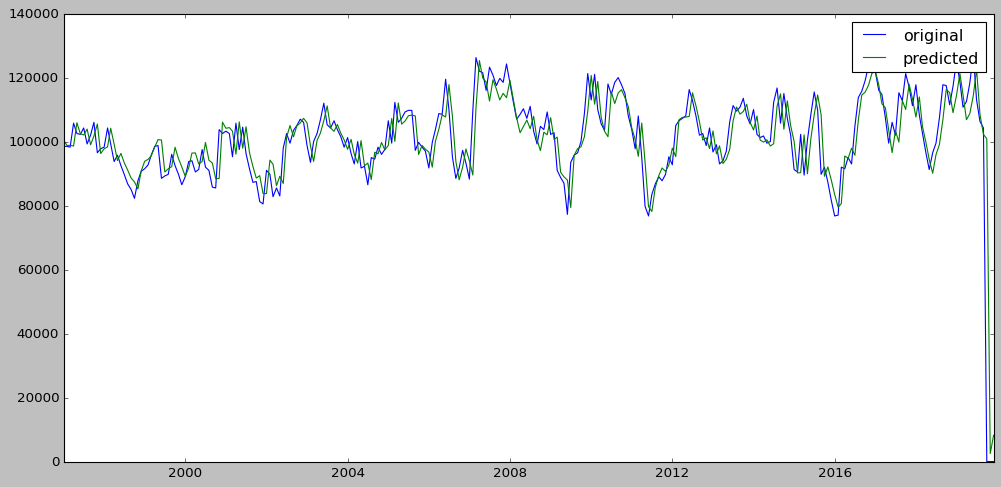

In [70]:
# An example plot showing original vs predicted value for Finance industry
plt.style.use('classic')
plt.figure(figsize=(15,7))
plt.plot(mer_f3['Finance'])
plt.plot(pred1['Finance'])
plt.legend(['original','predicted'])

From the above plot, we can see the original and predicted value are **moving closely**, thought there are **little deviation**. We can see measure the deviation using **mean squared error**, lower the value better our prediction.

In [82]:
# Mean squared error calculation for each series
from sklearn.metrics import mean_squared_error
for i in range(len(col3)):
  print('Mean Squared Error of ',col3[i] ,'is', str(mean_squared_error(mer_f3[col3[i]],pred1[col3[i]])))

Mean Squared Error of  Broadcasting, data processing, and information is 10825143.500949852
Mean Squared Error of  Finance is 75124965.2657686
Mean Squared Error of  Food, beverage and tobacco manufacturing is 49216232.400838494
Mean Squared Error of  Legal, accounting, design, research, and advertising services is 51428813.5135036
Mean Squared Error of  Local and Indigenous public administration is 53588985.52655802
Mean Squared Error of  Postal service, couriers and messengers is 21236861.524769045
Mean Squared Error of  Transportation equipment manufacturing (excluding shipbuilding) is 2109470.440447376
Mean Squared Error of  Wholesale trade is 181347468.8042677


**Note:** Above we used **ARMA(p,q)** order model where **p is the number of autoregressive(AR) lags and q is the number of Moving Average(MA) lag**. Since the time series above are already sationary d=0, no differencing required. Id dis of some value it becomes **ARIMA(p,d,q)**.

In [71]:
col2

['Business, building and other support services',
 'Farms',
 'Other manufacturing',
 'Other retail trade (excluding cars and personal care) ',
 'Private and trades education',
 'Transit, sightseeing, and pipeline transportation']

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
l3=[]
for i in col2:
  for p in range(3):
    for q in range(3):
      try:
        model=SARIMAX(mer_f3[i],order=(p,1,q))
        result=model.fit()
        #print(i,p,q,result.aic)
        l3.append((i,(p,q),result.aic))
      except:
       # print(i,p,q,None)
        l3.append((i,(p,q),result.aic))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

In [73]:
df1_aic=pd.DataFrame(l3,columns=['name','order','aic'])
df1_aic

,name,order,aic
0,"Business, building and other support services","(0, 0)",6106.203347
1,"Business, building and other support services","(0, 1)",6107.897608
2,"Business, building and other support services","(0, 2)",6109.741503
3,"Business, building and other support services","(1, 0)",6107.862236
4,"Business, building and other support services","(1, 1)",6109.074752
5,"Business, building and other support services","(1, 2)",6111.619506
6,"Business, building and other support services","(2, 0)",6109.649803
7,"Business, building and other support services","(2, 1)",6111.648932
8,"Business, building and other support services","(2, 2)",6100.335940
9,Farms,"(0, 0)",5615.529004


In [ ]:
k1=pd.crosstab(df1_aic['order'],df1_aic['name'],values=df1_aic['aic'],aggfunc=np.mean)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so i

6

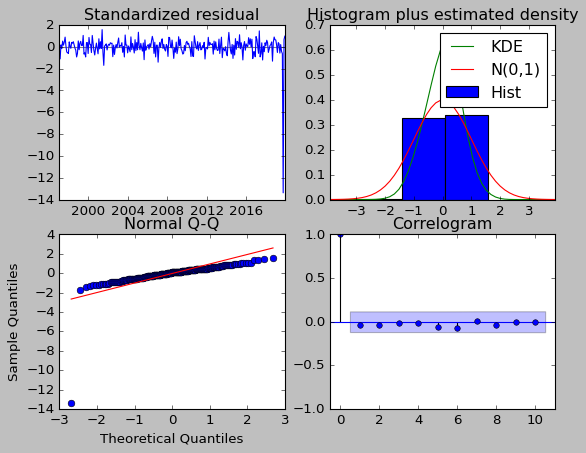

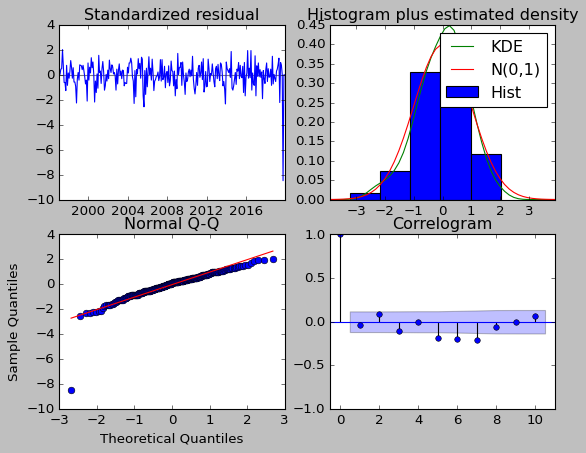

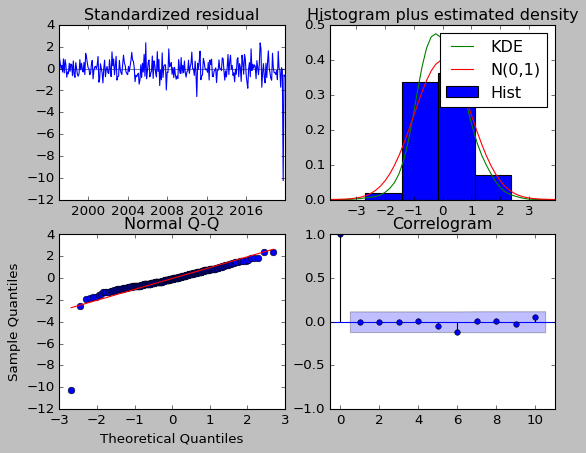

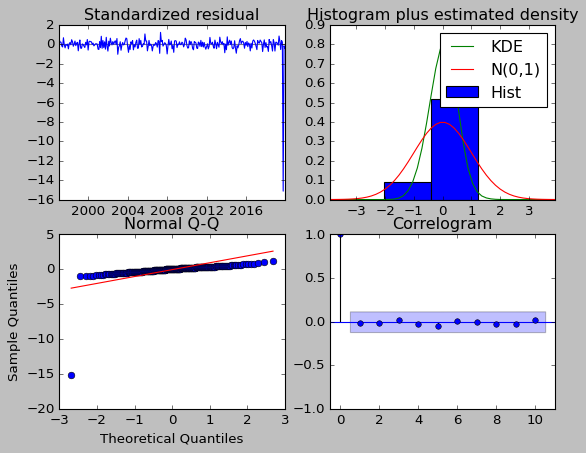

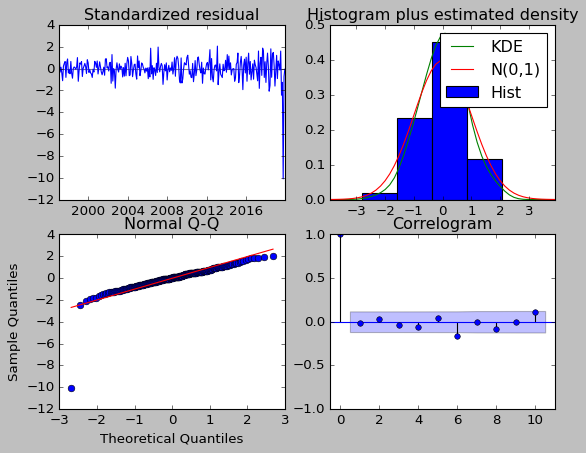

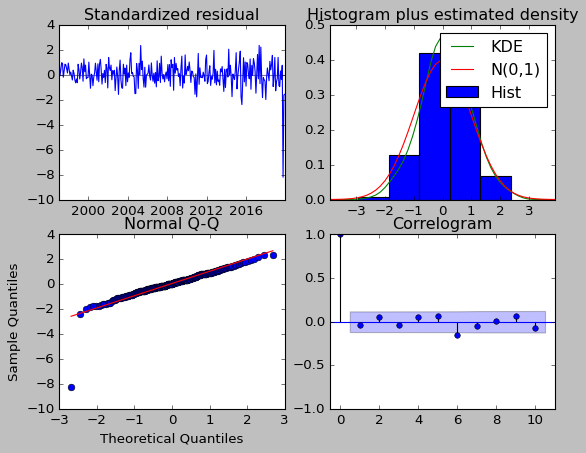

In [75]:
# making ARIMA(p.1,q) models with optimal p,q for each series chosen from above
in__=k1.apply(np.argmin).values
pred2=[]
from statsmodels.tsa.statespace.sarimax import SARIMAX
for i in range(len(col2)):
  model1=SARIMAX(mer_f3.loc[:,col2[i]],order=(k1.index[in__[i]][0],1,k1.index[in_[i]][1]))
  results1=model1.fit()
  pred2.append(results1.predict())
  results1.plot_diagnostics()
len(pred2)

We can see a series of plots with 4 subploots. There are 6 such plots denoting each of 6 features forecasted here. So the plots are for features a. **Business, building and other support services**, b. **Farms**, c. **Other manufacturing**, d. **Other retail trade (excluding cars and personal care)** e. **Private and trades education** f. **Transit, sightseeing, and pipeline transportation**. in the order I mentioned.

Out of the four subplots one(row1,col1) is the **residual plot**. So if our model is working fine the residual plot should not have any particular structure/pattern. So it should have 0 mean and constant variance. For features 1 to 4, the residual pattern seems okay, even for others it seems closer maybe some spikes be present there due to outliers. In features 5 & 6 through the variance seems to increase a bit towards the end but overall it's good.

The **histogram**(row1,col2) shows the measured distribution. The orange line denotes the smoothed version of the histogram whereas the green line shows normal distribution. If our model is good the two lines should almost be same. For features 1, 5, 6 they seems closer, but for others , the lines seem distant. Those models can be checked with other lagged values to see if better model is found.

The third plot(row 2,col 1) **compares the distribution of model residuals compared to normal distribution**. If the residuals are normally distributed, the thick blue line should aling with the red line, i.e, it should be straight. This property seems good for all the features except deviations found in features 1 & 4.

The last graph(row 2, col 2) is called the **correlogram**, which is just ACF plot of residuals.If there are correlation present then it's not good model as there must be information in our data that our model failed to capture. Significant lags present in feature 2.

**Note:** same can be done for ARMA model also, but there is no direct function I guess, so each graph should be plotted separately.


In [77]:
# getting the prediction into a dataframe
pred3=pd.DataFrame(index=mer_f3.index)
for i in range(len(pred2)):
  pred3[col2[i]]=pred2[i]
pred3

,"Business, building and other support services",Farms,Other manufacturing,Other retail trade (excluding cars and personal care),Private and trades education,"Transit, sightseeing, and pipeline transportation"
Date,,,,,,
1997-01-01,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1997-02-01,129635.212042,44750.0,102857.305085,392389.320552,14246.286862,20834.524582
1997-03-01,131491.780919,47750.0,105060.229753,397594.393492,17032.606787,24614.717073
1997-04-01,119847.708033,48000.0,113047.640433,405247.729354,16074.770222,22103.199417
1997-05-01,124897.436361,51000.0,121270.124004,413200.891247,16469.209379,22515.097121
...,...,...,...,...,...,...
2019-08-01,242091.524357,50250.0,110402.994360,523142.943622,43872.029880,44072.017739
2019-09-01,229168.355783,55250.0,113029.219470,537614.389593,36570.008738,42852.412933
2019-10-01,211905.049588,55500.0,109623.383584,545789.143436,32794.706776,47014.482109


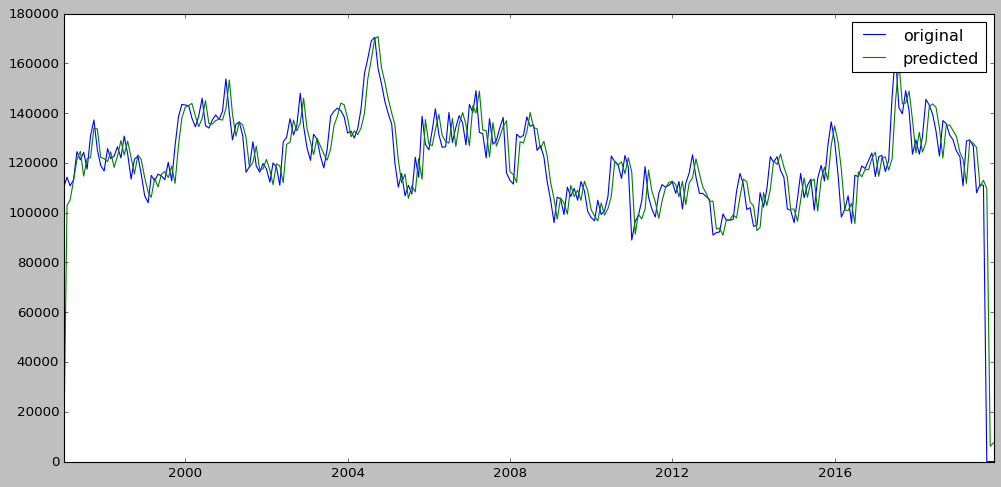

In [78]:
# Seeing tje original vs predicted values for Other manufacturing industry
plt.style.use('classic')
plt.figure(figsize=(15,7))
plt.plot(mer_f3['Other manufacturing'])
plt.plot(pred3['Other manufacturing'])
plt.legend(['original','predicted'])

As seen above the observe and predicted values **resembles closely**. The error or prediction can again be measured using **mean squared error**.

In [80]:
for i in range(len(col2)):
  print('Mean Squared Error of ',col2[i] ,'is', str(mean_squared_error(mer_f3[col2[i]],pred3[col2[i]])))

Mean Squared Error of  Business, building and other support services is 293778446.910572
Mean Squared Error of  Farms is 50024456.52173913
Mean Squared Error of  Other manufacturing is 156785629.8429165
Mean Squared Error of  Other retail trade (excluding cars and personal care)  is 1832311429.4776976
Mean Squared Error of  Private and trades education is 11229233.854295908
Mean Squared Error of  Transit, sightseeing, and pipeline transportation is 33475050.306637272


Comparing the MSE(mean squared error) scores for the ARMA as well as ARIMA  models it seem like **Transportation equipment manufacturing (excluding shipbuilding)** has the best model.

**Few Question Regarding the Analysis:**

 1. Which industry has highest and lowest number of employments throughout?

 Ans: **Other retail trade (excluding cars and personal care)**[highest] & **Transportation equipment manufacturing (excluding shipbuilding)**[lowest].

 2. Name few industries which has upward employment trend over time.

 Ans: **Private and trades education** and  **Business, building and other support services**

3. Name few industries where employment downgraded/decreased over time.

Ans: There is no such industry where the trend of employment decreased starkly but in **Farms** industry the trend started decreasing a bit from 2010.

4. Name few industries where there are similar trends/characteristics of employment.

Ans: **Business, building and other support services** and **Other retail trade (excluding cars and personal care)** 

**Farms** and **Other** **manufacturing**

5. Out of your models made, which one is best in predicting future employment values?

Ans: ARMA model for **Transportation equipment manufacturing (excluding shipbuilding)**
 